# Traffic Sign  Classifier

**The Function that accepts an image and predicts its label**




In [143]:
# predictionFunc is the function that accepts an image and predicts its label 
# it takes two parameter 1.the image path - 2.the loadedmodel
#you must load the model first
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
from numpy import expand_dims
from PIL import Image
def predictionFunc(imgpath,loadedmodel):
      P_test_img = cv2.imread(imgpath)
      P_test_img = Image.fromarray(P_test_img, 'RGB')
      P_test_img = P_test_img.resize((32, 32))
      P_test_img=np.array(P_test_img)
      P_test_img= (P_test_img.astype('float32')) / 255.
    
      P_test_img_input=np.expand_dims(P_test_img, 0)
      prediction = loadedmodel.predict(P_test_img_input)
      #print(prediction)

      predicted_class = np.argmax(prediction, axis=None)

      plt.figure(figsize=(2, 2))
      plt.imshow(P_test_img)

      classes = ['Speed limit (20km/h)', 'Speed limit (30km/h)',
        'Speed limit (50km/h)', 'Speed limit (60km/h)',
        'Speed limit (70km/h)', 'Speed limit (80km/h)',
        'End of speed limit (80km/h)', 'Speed limit (100km/h)',
        'Speed limit (120km/h)', 'No passing',
        'No passing for vehicles over 3.5 metric tons',
        'Right-of-way at the next intersection', 'Priority road', 'Yield',
        'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited',
        'No entry', 'General caution', 'Dangerous curve to the left',
        'Dangerous curve to the right', 'Double curve', 'Bumpy road',
        'Slippery road', 'Road narrows on the right', 'Road work',
        'Traffic signals', 'Pedestrians', 'Children crossing',
        'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing',
        'End of all speed and passing limits', 'Turn right ahead',
        'Turn left ahead', 'Ahead only', 'Go straight or right',
        'Go straight or left', 'Keep right', 'Keep left',
        'Roundabout mandatory', 'End of no passing',
        'End of no passing by vehicles over 3.5 metric tons']
      prediction_label=classes[predicted_class]
      print("Predicted class is:",predicted_class ,prediction_label)
      
     

My model link : https://drive.google.com/file/d/18_8JjTWhIuJbB3lK4BwBmi8V0vp6Ix-u/view?usp=sharing

 **Here i loaded the model and named it as my_loaded_model**

In [ ]:
# load my model
from keras.models import load_model
my_loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/saved_models/traffic_signs_model.h5')



imagePath is a str variable that contains the path of the image i want to be labeled 

**I call the predictionFunc function with (imagePath and my_loaded_model parameters )**

Predicted class is: 0 Speed limit (20km/h)


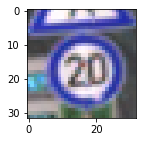

In [150]:
# the image path that you want to predicit
imagePath = '/content/drive/MyDrive/Colab Notebooks/00000_00000_00011.png'

predictionFunc(imagePath,my_loaded_model)

# Load data & train and test the model  & save the model 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import glob
import cv2
from PIL import Image
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

In [ ]:
image_directory = '/content/drive/MyDrive/Images'
dataset = [] 
label = []  
SIZE = 32

for directory_path in glob.glob("/content/drive/MyDrive/Images/*"):
    dlabel = directory_path.split("//")[-1]
    print(dlabel)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        print(img_path)
        image = cv2.imread(img_path) #Reading color images
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(image)
        label.append(dlabel)


In [17]:
datasetarray =[]

for i in dataset:
   datasetarray.append(np.array(i))

dataset = np.array(datasetarray)
label = np.array(label)


In [27]:
labelarray =[]
for x in label:
    labelarray.append(int(x[30:]))

labelarray=np.array(labelarray)



In [28]:


from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(dataset, labelarray, test_size = 0.20, random_state = 0)


print("The size of training dataset is: ", X_train.shape)
print("The size of testing dataset is: ", X_test.shape)
print("The size of training dataset y is: ", y_train.shape)
print("The size of testing dataset y is: ", y_test.shape)


The size of training dataset is:  (31367, 32, 32, 3)
The size of testing dataset is:  (7842, 32, 32, 3)
The size of training dataset y is:  (31367,)
The size of testing dataset y is:  (7842,)


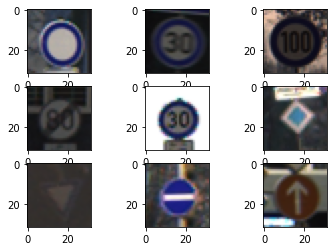

In [151]:
#view few images 
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
plt.show()

In [29]:
X_train = (X_train.astype('float32')) / 255.
X_test = (X_test.astype('float32')) / 255.

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [30]:
print(y_train[0])
print(y_train[1])
print(y_train[10])

print(y_train_cat[0])
print(y_train_cat[1])
print(y_train_cat[10])

15
1
36
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [31]:
#Define Model 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(43, activation='softmax'))

# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [32]:
#Add earlystopping.
from keras.callbacks import  EarlyStopping


early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
#This callback will stop the training when there is no improvement in


callbacks_list = [early_stop]

In [33]:
#Fit model...

history = model.fit(X_train, y_train_cat, 
                    epochs=50, batch_size=64, 
                    validation_data=(X_test, y_test_cat), 
                    verbose=1, callbacks=callbacks_list)

Epoch 1/100
491/491 [==============================] - 41s 26ms/step - loss: 3.2437 - accuracy: 0.2156 - val_loss: 1.7274 - val_accuracy: 0.5219
Epoch 2/100
491/491 [==============================] - 12s 25ms/step - loss: 1.7439 - accuracy: 0.4892 - val_loss: 0.9780 - val_accuracy: 0.7195
Epoch 3/100
491/491 [==============================] - 12s 25ms/step - loss: 1.1941 - accuracy: 0.6424 - val_loss: 0.5983 - val_accuracy: 0.8398
Epoch 4/100
491/491 [==============================] - 12s 24ms/step - loss: 0.8450 - accuracy: 0.7467 - val_loss: 0.3819 - val_accuracy: 0.8985
Epoch 5/100
491/491 [==============================] - 12s 25ms/step - loss: 0.6402 - accuracy: 0.8076 - val_loss: 0.2638 - val_accuracy: 0.9353
Epoch 6/100
491/491 [==============================] - 12s 25ms/step - loss: 0.5078 - accuracy: 0.8464 - val_loss: 0.1873 - val_accuracy: 0.9572
Epoch 7/100
491/491 [==============================] - 12s 25ms/step - loss: 0.4129 - accuracy: 0.8804 - val_loss: 0.1430 - val_ac

246/246 [==============================] - 2s 8ms/step - loss: 0.0014 - accuracy: 0.9997
Accuracy =  99.97449517250061 %


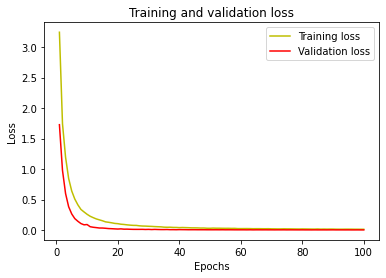

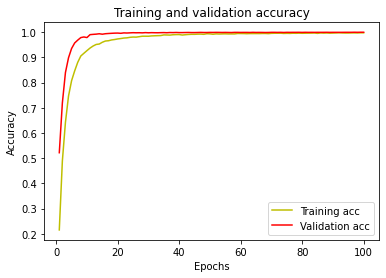

In [34]:
_, acc = model.evaluate(X_test, y_test_cat)
print("Accuracy = ", (acc * 100.0), "%")

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [152]:
# testing the model
# Predicting the Test set results
y_pred_test = model.predict(X_test)
prediction_test = np.argmax(y_pred_test, axis=1)
ground_truth = np.argmax(y_test_cat,axis=1)



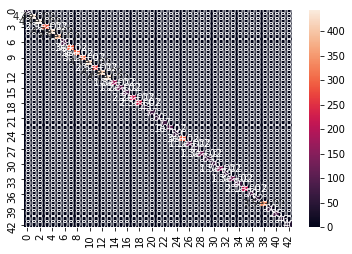

In [153]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(ground_truth, prediction_test)

sns.heatmap(cm, annot=True)

In [46]:
# saving the model 

model.save('/content/drive/MyDrive/Colab Notebooks/saved_models/traffic_signs_model.h5')

**Test Random images**



Original class is: 38 Keep right
Predicted class is: 38 Keep right


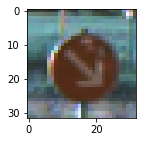

In [154]:
# test a random image
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
ground_truth= np.argmax(y_test_cat[test_img_number], axis=None)
prediction = model.predict(test_img_input)
#print(prediction)

predicted_class = np.argmax(prediction, axis=None)

plt.figure(figsize=(2, 2))
plt.imshow(test_img)

classes = ['Speed limit (20km/h)', 'Speed limit (30km/h)',
       'Speed limit (50km/h)', 'Speed limit (60km/h)',
       'Speed limit (70km/h)', 'Speed limit (80km/h)',
       'End of speed limit (80km/h)', 'Speed limit (100km/h)',
       'Speed limit (120km/h)', 'No passing',
       'No passing for vehicles over 3.5 metric tons',
       'Right-of-way at the next intersection', 'Priority road', 'Yield',
       'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited',
       'No entry', 'General caution', 'Dangerous curve to the left',
       'Dangerous curve to the right', 'Double curve', 'Bumpy road',
       'Slippery road', 'Road narrows on the right', 'Road work',
       'Traffic signals', 'Pedestrians', 'Children crossing',
       'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing',
       'End of all speed and passing limits', 'Turn right ahead',
       'Turn left ahead', 'Ahead only', 'Go straight or right',
       'Go straight or left', 'Keep right', 'Keep left',
       'Roundabout mandatory', 'End of no passing',
       'End of no passing by vehicles over 3.5 metric tons']

original_label=classes[ground_truth]
prediction_label=classes[predicted_class]

print("Original class is:",ground_truth, original_label)
print("Predicted class is:",predicted_class ,prediction_label)

